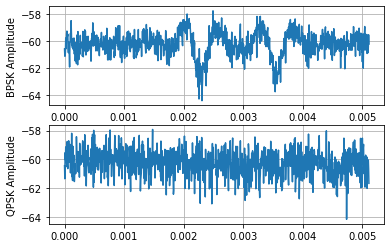

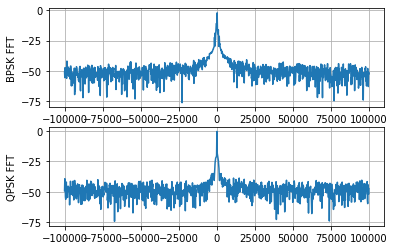

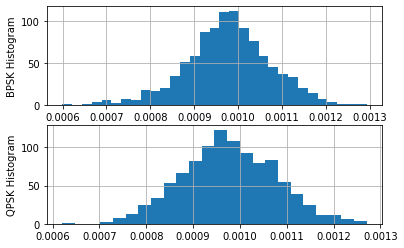

In [1]:
from plot_data import *
import numpy as np
import matplotlib.pyplot as plt

# initialize dataset location
folTest = os.getcwd() + '/../gnuradio_sim/'
fileTest = 'SIGNN_2019_01_1024.hdf5'

# modulations
mod1 = 'BPSK'
mod2 = 'QPSK'
snr = 10

# extract datasets
wbfmSet = parse_dataset(mod1, snr, folTest, fileTest)
amdsbSet = parse_dataset(mod2, snr, folTest, fileTest)

# extract example vectors for analysis
wbfmSig = wbfmSet[np.random.randint(wbfmSet.shape[0]), :]
amdsbSig = amdsbSet[np.random.randint(amdsbSet.shape[0]), :]

# print plots
print_plots(wbfmSig, mod1, amdsbSig, mod2, fs=200e3)

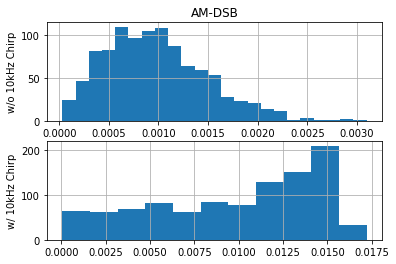

In [50]:
# establish plotting vectors
fs = 200e3
nLen = len(wbfmSig)
tVec = np.linspace(0, (nLen - 1) / fs, nLen)
fVec = np.linspace(-1, 1, nLen) * fs / 2
# set fm parameters
delF = 75e3
fmax = 20e3
fChirp = 10e3
Ac = 15e-3
# pre-process modulated data
chirpWav = np.cos(2 * np.pi * np.cumsum(fChirp * np.linspace(0, 1, nLen) / fs))
fmWav = Ac * np.exp(1j * 2 * np.pi * np.cumsum(chirpWav / fs)) + wbfmSig
amWav = Ac * chirpWav + amdsbSig

# modulated chirp
plt.figure(1)
plt.subplot(2,1,1)
#plt.plot(fVec, 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(amWav)))))
plt.hist(np.abs(amdsbSig), bins='auto')
plt.title('AM-DSB')
plt.ylabel('w/o 10kHz Chirp')
plt.grid(True)
plt.subplot(2,1,2)
plt.hist(np.abs(amWav), bins='auto')
plt.ylabel('w/ 10kHz Chirp')
plt.grid(True)